In [68]:
using JSON
using CairoMakie

include("../../Modules/TestingFunctions.jl")
using .TestingFunctions

# Testing number of steps

In [69]:
ON_layered_test_search = Dict(
    "prediction_type" => "multi_step",
    "testing_params" => Dict(
        "mask_states_b4_readout" => false,
        "stochastic" => false,
        "stochastic_rescale_V_rec" => false,
        "readout_switching" => true
    ),
    "data" => "Lorenz 0_01",
    "testing_parameter" => "n_steps",
    "ignore_first" => 100,
    "trials" => 30,
    "total_k" => 468
)
ON_layered_tests = find_test(ON_layered_test_search)

4-element Vector{Any}:
 Dict{String, Any}("prediction_type" => "multi_step", "testing_params" => Dict{String, Any}("stochastic" => false, "mask_states_b4_readout" => false, "stochastic_rescale_V_rec" => false, "readout_switching" => true), "data" => "Lorenz 0_01", "num_partitions" => 2, "error_funcs" => Any["RMSE", "turning_partition_RMSE"], "testing_parameter" => "n_steps", "k" => 468, "date" => "2025-03-13", "ignore_first" => 100, "errors" => Dict{String, Any}("RMSE" => Any[0.44907361847253785, 0.6978624511987744, 0.946384271937755, 1.4304076659203266, 2.529509786726047, 4.09308171382928, 5.05726888165751, 5.412955156162468, 6.1028855385251495, 7.340649134277169, 8.09585919155606], "turning_partition_RMSE" => Any[0.12795696941489762, 0.18882162536826186, 0.3915748998400163, 1.0140876709127997, 2.6611494234516617, 5.076696492593014, 5.860838774139823, 5.794026140920406, 6.041320659833404, 8.839403337635462, 10.035896929818007])…)
 Dict{String, Any}("prediction_type" => "multi_step", "

In [70]:
test_dict = Dict()

for test in ON_layered_tests
    test_dict["m = " * string(test["m"])] = test
end


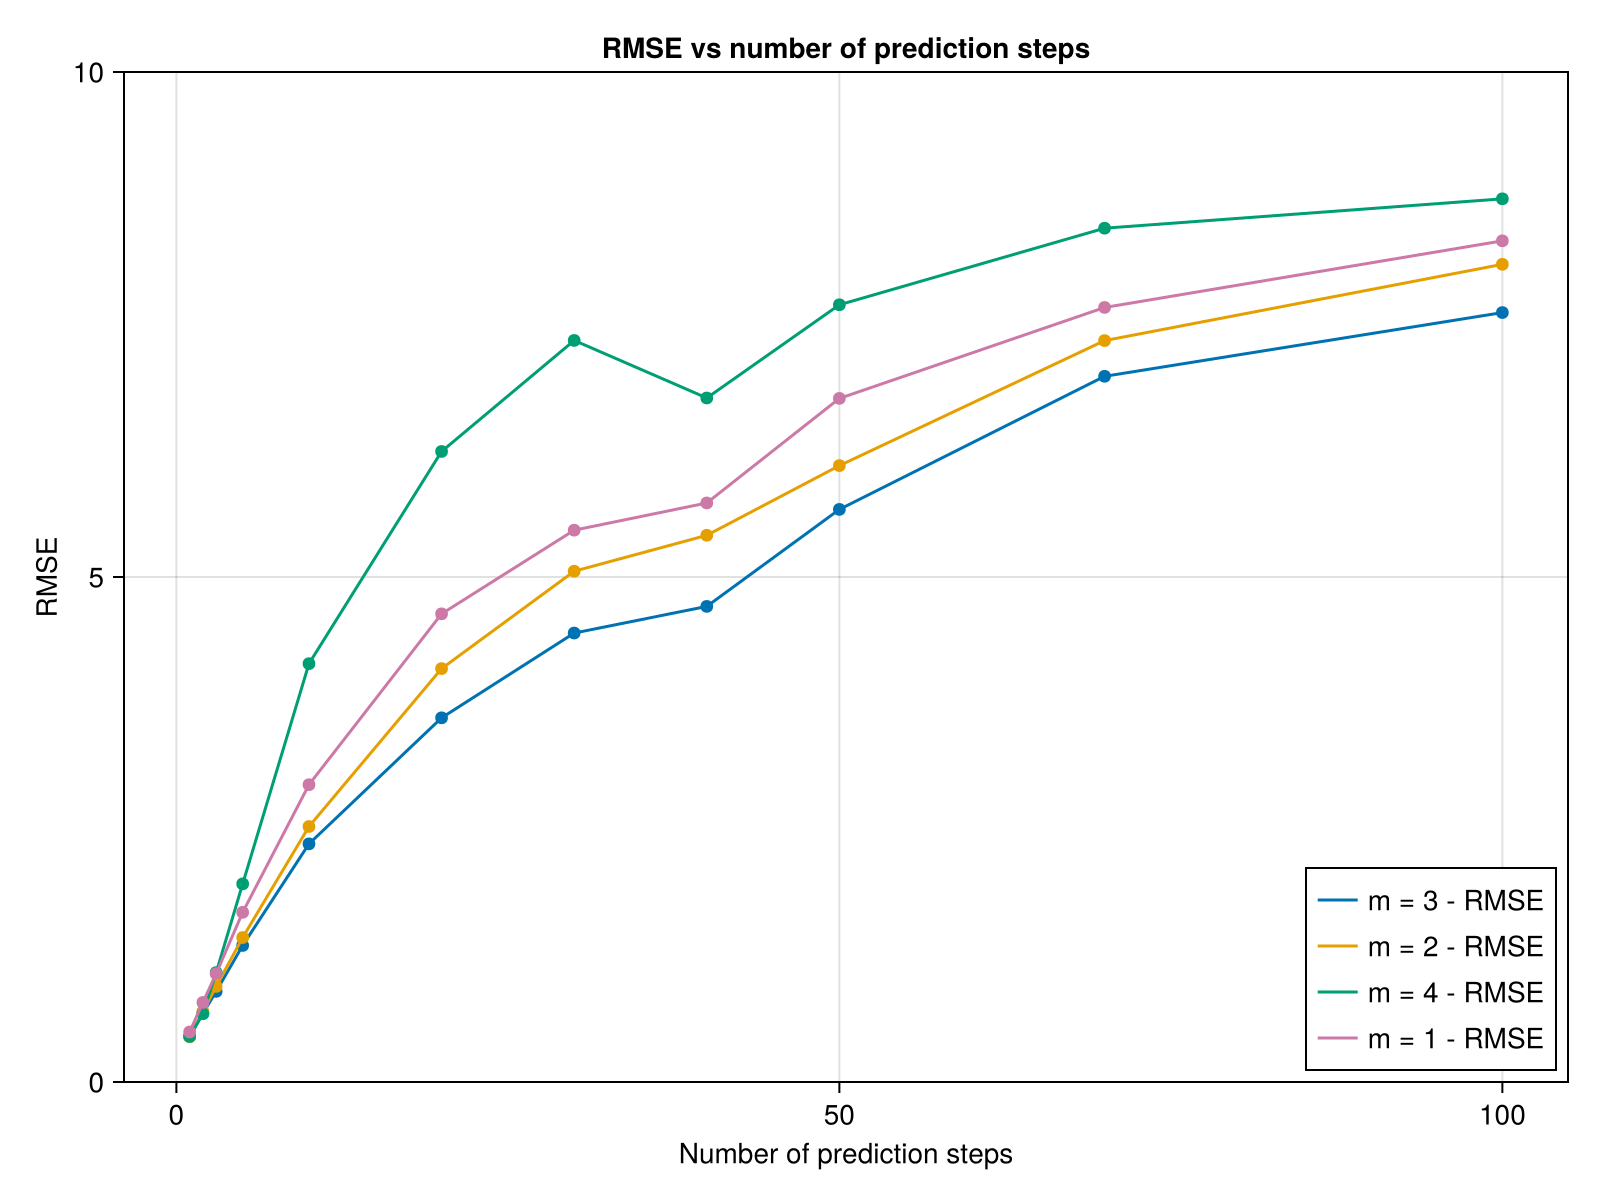

In [71]:
fig = chart_tests(
    "RMSE vs number of prediction steps",
    "Number of prediction steps",
    "RMSE",
    test_dict,
    metrics=["RMSE"],
    ylim_low=0,
    ylim_high=10
)

CairoMakie.save("readout_switching_rmse_vs_steps.pdf", fig)

fig

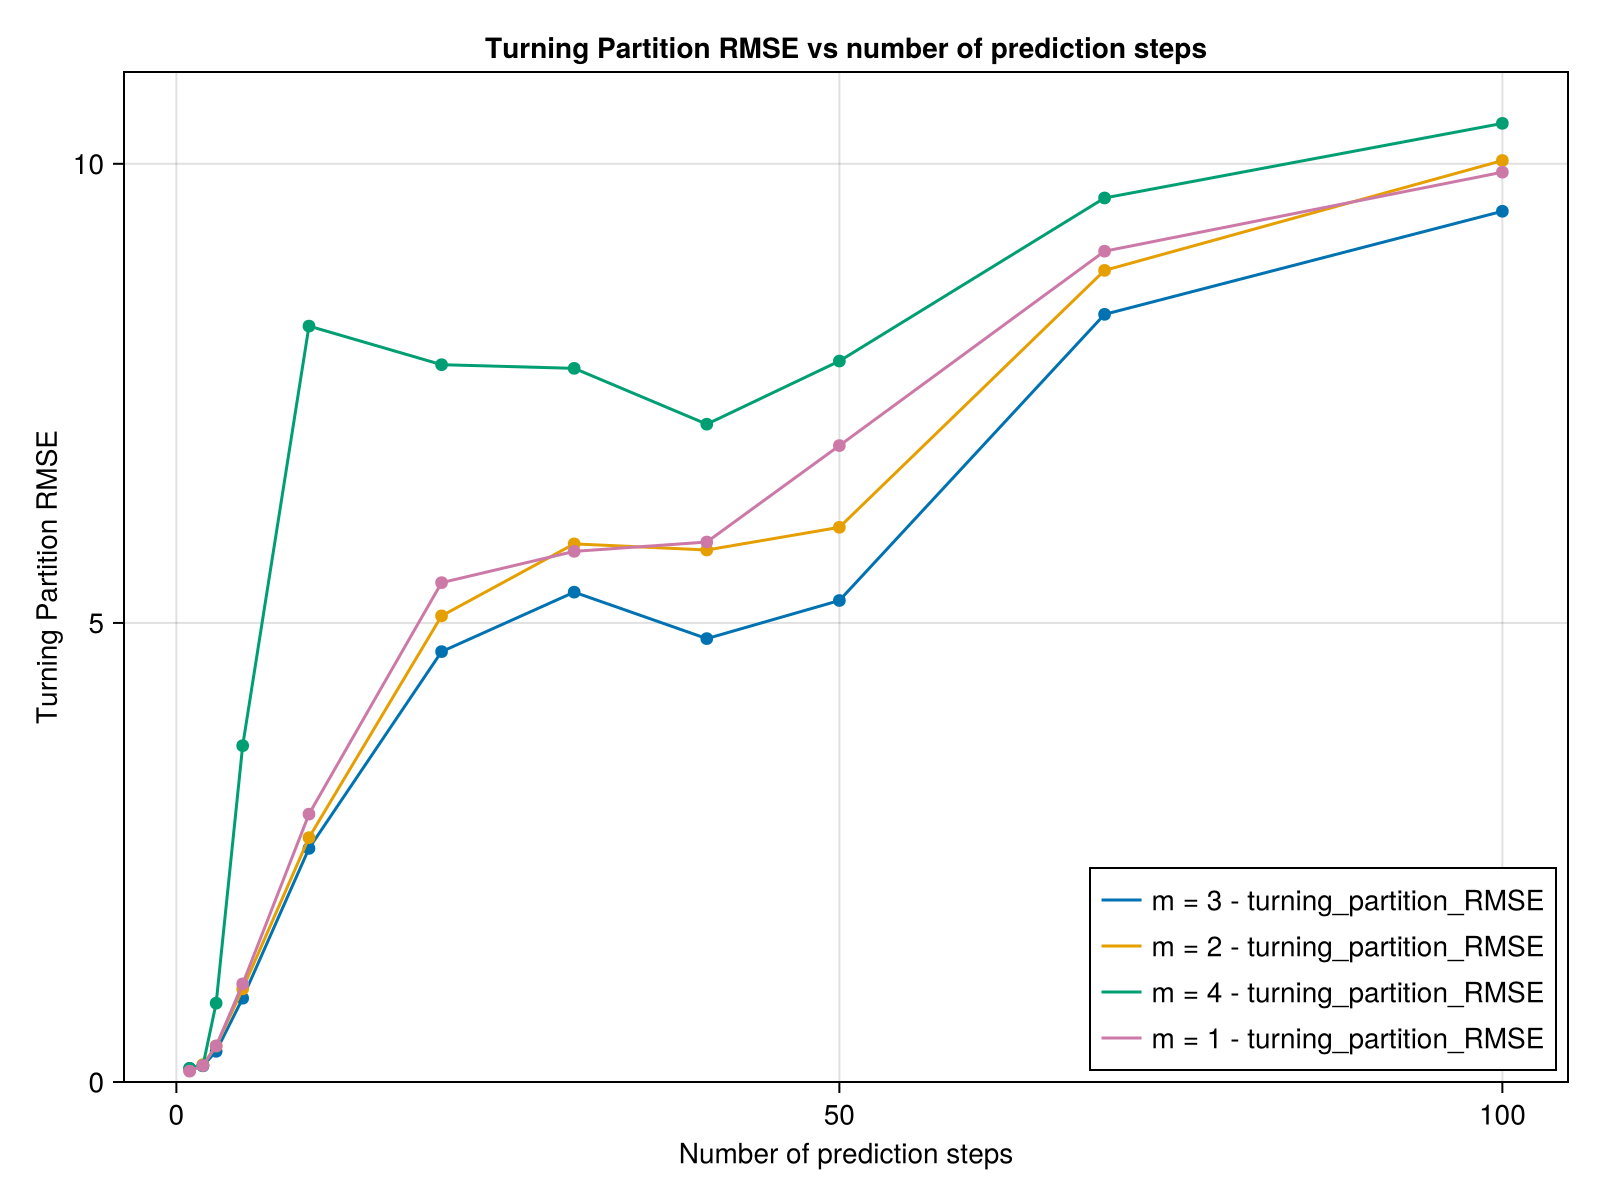

In [72]:
chart_tests(
    "Turning Partition RMSE vs number of prediction steps",
    "Number of prediction steps",
    "Turning Partition RMSE",
    test_dict,
    metrics=["turning_partition_RMSE"],
    ylim_low=0,
    ylim_high=11
)